<font color='pink'>**Homework exercise**</font>

This is our final session. After today, you know how to work with Python on your own laptop, to work with GIT for code organisation (and version control), to use Python's built-in data types, functions and modules to solve tasks like renaming files or generating random lists of experimental stimuli. On top of all that, you know how to use external packages (and more importantly to solve weird annoying errors installing external packages), program a simple experiment and how to import, process and analyze experimental data. 

Now let's put that into practice! For this final homework assignment we like you to read in a dataset of choice. We ask you to create an analysis-notebook, that should contain at least:

- A nice introduction at the top, explaining what you did (in a Markdown cell)
- A table summarizing your data
- A plot of your contrast of interest
- A statistical test to determine its significance
- In between: text boxes in markdown describing what you are doing

We like you to do this in a completely new, fresh notebook.


Here we'd also like to thank you for your great efforts (and for not getting mad when we encountered so many installation errors). We really had a great time and hope you learned something useful :) . 

Hello! 

First of all, I would like to thank you for this lovely and insightful course! I learned a lot from you and I hope to implement them in my future reseach! Dank jullie wel! 

For this homework, I used the dataset from my thesis. Here, participants named pictures followed by contexts that vaaried in structure (structured vs. unstructured) and context constraint (constraining vs. nonconstraining). For my data visualization and statistical analysis, I will be using response times (RTs) as the dependent variable. 


In order to do any of that, I first need to import all the packages I need! 

In [2]:
#import packages

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import numpy as np
import pandas as pd
import os 


Then, I load the dataframe with all my data. 

In [3]:
path = 'C://Users/Christina Papoutsi/IMPRS-Python-course-session1/session7_stats/'

# load the data we used previously
trials = pd.read_csv(os.path.join(path, 'all_data2_21.csv'))
trials

,File,sbj,Block_nr,Trial_nr,ItemID,word_1,word_2,word_3,picture,filename,marker,condition,constraint,wordorder,presentation_RT,accuracy,accuracy_comments,manual_RT
0,Exp_EEG2.txt,2,1,1,177,pijp,lauwerkrans,farao,clown,clown.png,7,unstructured,uc,NO,859,1,NaN,0.800000
1,Exp_EEG2.txt,2,1,2,191,gangpad,zoomlens,bladmuziek,octopus,octopus.png,7,unstructured,uc,NO,0,1,NaN,0.693333
2,Exp_EEG2.txt,2,1,3,157,groente,knoflook,sjalot,ui,onion.png,3,unstructured,c,NO,600,1,NaN,0.528863
3,Exp_EEG2.txt,2,1,4,59,sloeg,kakkerlak,met,bezem,broom01.png,9,structured,uc,VOP,0,1,NaN,0.680000
4,Exp_EEG2.txt,2,1,5,160,piloot,helikopter,stewardess,vliegtuig,plane.png,3,unstructured,c,NO,0,1,NaN,0.631601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,Exp_EEG21.txt,21,10,216,159,strijkstok,kin,snaar,viool,violin.png,3,unstructured,c,NO,749,1,NaN,0.773333
4396,Exp_EEG21.txt,21,10,217,196,dooier,ruimtestation,foto,plantje,plant02b.png,7,unstructured,uc,NO,739,1,NaN,0.773333
4397,Exp_EEG21.txt,21,10,218,202,wol,larve,pink,schoen,shoe.png,7,unstructured,uc,NO,559,1,NaN,0.545419
4398,Exp_EEG21.txt,21,10,219,29,astronaut,landde,op,maan,moon.png,1,structured,c,SVP,840,1,NaN,0.826667


Cool! Now, I will summarize my data, averaging RTs over each condition and context constraint.

In [4]:
summary = trials.groupby(by=['condition', 'constraint']).aggregate(
    mean_RT=pd.NamedAgg('manual_RT', np.mean),
    median_RT=pd.NamedAgg('manual_RT', np.median),
    std_RT=pd.NamedAgg('manual_RT', np.std)
)

summary

mean_RT  median_RT    std_RT
condition    constraint                               
structured   c           0.571556   0.551469  0.193488
             uc          0.732012   0.687108  0.207592
unstructured c           0.610141   0.592709  0.220743
             uc          0.718179   0.686166  0.181287

Ok, now let's make a beautiful boxplot! I am using color to separate the 'structure' conditions. The 'constraint' conditions are shown in x axis. 

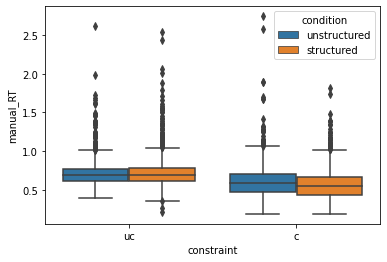

In [5]:
# sns.boxplot(x=['condition', 'constraint'], y='manual_RT', data=trials)
sns.boxplot(x='constraint', y='manual_RT', data=trials, hue="condition")

plt.show()

WOnderful! Have you ever seen such a beautiful boxplot? 

Alright, moving on, I will run a linear mixed effects model in order to see whether the two independent variables, condition and constraint, as well as their interaction, predict the RTs in the experiment. 

Ideally, I would start with a maximal random effect structure (in this case, having a by-item random slope for constraint, a by-participant random slope for condition and constraint). Of course, this would lead to convergence errors, and I was not able to figure out how to add more than one random intercepts in the model. So, I will keep it as maximal as my python knowledge of running lmer models allows me!

In [6]:
import statsmodels.formula.api as smf

lmm0 = smf.mixedlm("manual_RT ~ condition * constraint", trials, groups = 'sbj', re_formula='condition')
lmm0f = lmm0.fit()
print(lmm0f.summary())

c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                        Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           manual_RT
No. Observations:           4400              Method:                       REML     
No. Groups:                 20                Scale:                        0.0360   
Min. group size:            220               Log-Likelihood:               1003.2677
Max. group size:            220               Converged:                    No       
Mean group size:            220.0                                                    
-------------------------------------------------------------------------------------
                                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------
Intercept                                   0.572    0.013 44.493 0.000  0.546  0.597
condition[T.unstructured]                   0.039    0.020  1.977 0.048  0.000

c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python39\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
c:\Python39\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 51.420079
  warnings.warn(msg, ConvergenceWarning)
c:\Python39\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Python39\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings